In [1]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Activation, Input, Dense, Lambda, merge, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from MoS.MoS import MoS

In [3]:
nb_classes = 10
n_of_softmaxes = 3

In [4]:
def build_logistic_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
    return model

def build_mos_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(10, input_dim=input_dim))
    model.add(MoS(nb_classes, n_of_softmaxes))
    return model

In [5]:
# The usual MNIST dance
input_dim = 784

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [6]:
lr_model = build_logistic_model(input_dim, nb_classes)
mos_model = build_mos_model(input_dim, nb_classes)

In [7]:
batch_size = 128
nb_epoch = 20

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [90]:
lr_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lr = lr_model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_test, Y_test), callbacks=[early_stopping])
score_lr = lr_model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score_lr[0])
print('Test accuracy:', score_lr[1]) 

Test score: 0.26400360113084315
Test accuracy: 0.9278


In [91]:
# compile the model
mos_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mos = mos_model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_test, Y_test), callbacks=[early_stopping])
score_mos = mos_model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score_mos[0])
print('Test accuracy:', score_mos[1]) 

Test score: 0.21477217674553395
Test accuracy: 0.9374


In [92]:
lr_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [93]:
mos_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
_________________________________________________________________
mo_s_11 (MoS)                (None, 10)                470       
Total params: 8,320
Trainable params: 8,320
Non-trainable params: 0
_________________________________________________________________


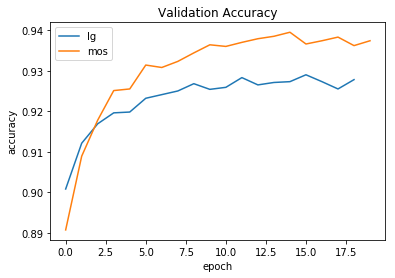

In [103]:
plt.plot(history_lr.history['val_acc'])
plt.plot(history_mos.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['lg', 'mos'], loc='upper left')
plt.show()

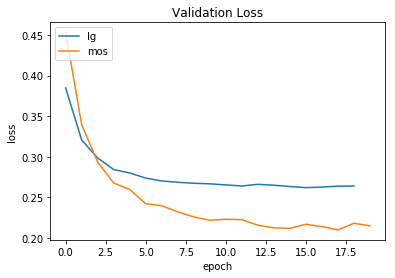

In [102]:
plt.plot(history_lr.history['val_loss'])
plt.plot(history_mos.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lg', 'mos'], loc='upper left')
plt.show()